In [60]:
import pandas as pd
import time

def to_epoch(date_time,pattern):
    int(time.mktime(time.strptime(date_time, pattern)))

data = pd.read_csv("~/Downloads/2019-06-19.data.txt") 
data.count()
data['NIFI_PROC_BEGIN_TIME_ET']= pd.to_datetime(data['NIFI_PROC_BEGIN_TIME_ET'])
data['SOLR_UPDATE_TIME_ET']= pd.to_datetime(data['SOLR_UPDATE_TIME_ET'])
data['SOLR_WRITE_TIME']= pd.to_datetime(data['SOLR_WRITE_TIME_GMT'])-pd.Timedelta(hours=4)
data['DB2_WRITE_TIME_ET']= pd.to_datetime(data['DB2_WRITE_TIME_ET'])
data["time_in_nifi"]= (data['SOLR_UPDATE_TIME_ET']-data['NIFI_PROC_BEGIN_TIME_ET'])
data["time_in_flume_kafka"]= (data['NIFI_PROC_BEGIN_TIME_ET']-data['DB2_WRITE_TIME_ET'])
data["time_to_send_to_solr"]= (data['SOLR_WRITE_TIME']-data['SOLR_UPDATE_TIME_ET'])
data["total_time_nifi_to_solr"]= (data['SOLR_WRITE_TIME']-data['NIFI_PROC_BEGIN_TIME_ET'])
data["total_time_db2_to_solr"]= (data['SOLR_WRITE_TIME']-data['DB2_WRITE_TIME_ET'])
data['time_from_db2_nifi']=(data['SOLR_UPDATE_TIME_ET']-data['DB2_WRITE_TIME_ET'])
def hr_func(ts):
        return (ts.total_seconds())
data["time_in_nifi"]=data["time_in_nifi"].apply(hr_func)
data["time_to_send_to_solr"]=data["time_to_send_to_solr"].apply(hr_func)
data["total_time_nifi_to_solr"]=data["total_time_nifi_to_solr"].apply(hr_func)
data["total_time_db2_to_solr"]=data["total_time_db2_to_solr"].apply(hr_func)
data["time_from_db2_nifi"]=data["time_from_db2_nifi"].apply(hr_func)
data["time_in_flume_kafka"]=data["time_in_flume_kafka"].apply(hr_func)
#data.head(300)


In [2]:
data[data['total_time_nifi_to_solr'] >= 0]['total_time_nifi_to_solr'].count()

169087

In [25]:
data = data[data['NIFI_PROC_BEGIN_TIME_ET'] < 
                                       data['SOLR_WRITE_TIME']]
#data = data[data['SOLR_UPDATE_TIME_ET'] < 
#                                       data['SOLR_WRITE_TIME']]

In [4]:
data[data['total_time_nifi_to_solr'] < 0]['total_time_nifi_to_solr'].count()

0

In [5]:
data[data['time_from_db2_nifi'] < 0]['time_from_db2_nifi'].count()

0

In [6]:
data[data['total_time_db2_to_solr']>14000].count()

DB2_WRITE_TIME_ET          0
NIFI_PROC_BEGIN_TIME_ET    0
SOLR_UPDATE_TIME_ET        0
SOLR_WRITE_TIME_GMT        0
SOLR_WRITE_TIME            0
time_in_nifi               0
time_in_flume_kafka        0
time_to_send_to_solr       0
total_time_nifi_to_solr    0
total_time_db2_to_solr     0
time_from_db2_nifi         0
dtype: int64

In [ ]:
#data["time_test"]=pd.to_datetime('2019-05-03 18:32:11.768000')
#page_data= data[data['time_in_flume_kafka']>8]
data[data['total_time_db2_to_solr']>28].count()
#page_data= page_data[page_data['time_in_flume_kafka'] <2]


In [ ]:
#page_data['time_in_flume_kafka'].describe(percentiles=[0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])
data.sort_values(by='total_time_db2_to_solr', ascending=False).head(30)

    

In [ ]:
data['time_to_send_to_solr'].describe(percentiles=[0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])


In [26]:
data['time_in_nifi'].describe(percentiles=[0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])


count    34270.000000
mean         0.131031
std          0.050475
min          0.040000
0%           0.040000
10%          0.077000
20%          0.087000
30%          0.097000
40%          0.109000
50%          0.125000
60%          0.140000
70%          0.152000
80%          0.165000
90%          0.188000
95%          0.212000
99%          0.312000
99.5%        0.335000
99.9%        0.373731
100%         0.496000
max          0.496000
Name: time_in_nifi, dtype: float64

In [ ]:
page_data['time_to_send_to_solr'].describe(percentiles=[0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])

In [27]:
data['total_time_db2_to_solr'].describe(percentiles=[0,0.10,0.20,0.30,0.40,0.60,0.70,0.80,0.90,0.95,0.99,0.995,.999,1.0])


count    34270.000000
mean         2.642613
std          2.384903
min          0.482000
0%           0.482000
10%          1.288000
20%          1.512000
30%          1.670000
40%          1.818000
50%          1.961000
60%          2.109000
70%          2.279000
80%          2.516000
90%          4.813700
95%          8.973650
99%         12.913310
99.5%       13.688585
99.9%       14.923351
100%        16.887000
max         16.887000
Name: total_time_db2_to_solr, dtype: float64

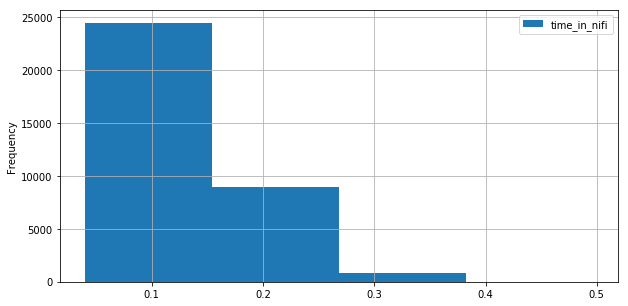

In [35]:
data.plot(y=['time_in_nifi'],x='DB2_WRITE_TIME_ET',kind='hist',grid=True,figsize=(10,5),bins=4) 

/Users/knarayanan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


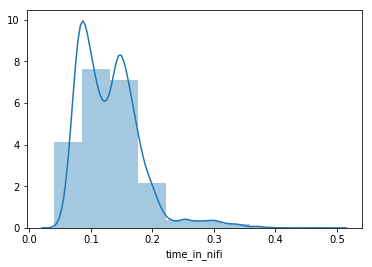

In [40]:
import seaborn as sns
sns.distplot(data['time_in_nifi'],bins=10)

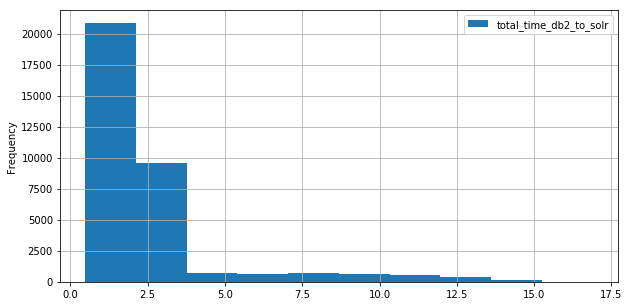

In [39]:
data.plot(y=['total_time_db2_to_solr'],x='DB2_WRITE_TIME_ET',kind='hist',grid=True,figsize=(10,5),bins=10) 

/Users/knarayanan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


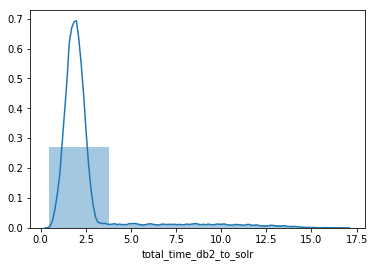

In [48]:
sns.distplot(data['total_time_db2_to_solr'],bins=5)

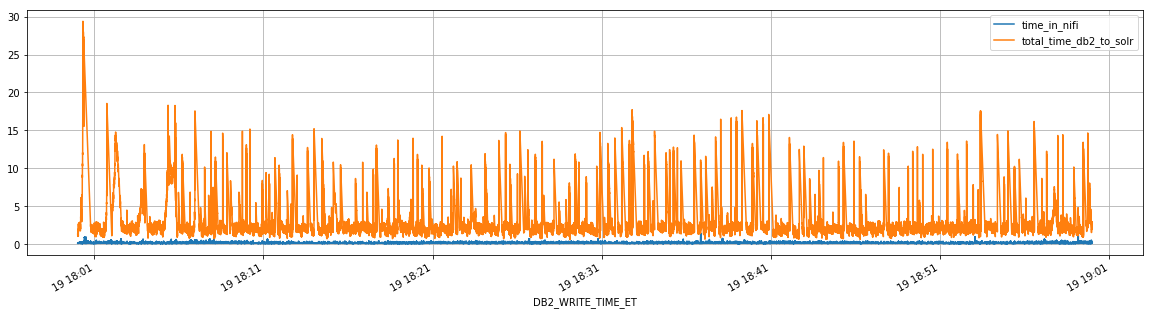

In [55]:
data.plot(y=['time_in_nifi','total_time_db2_to_solr'],x='DB2_WRITE_TIME_ET',kind='line',grid=True,figsize=(20,5)) 


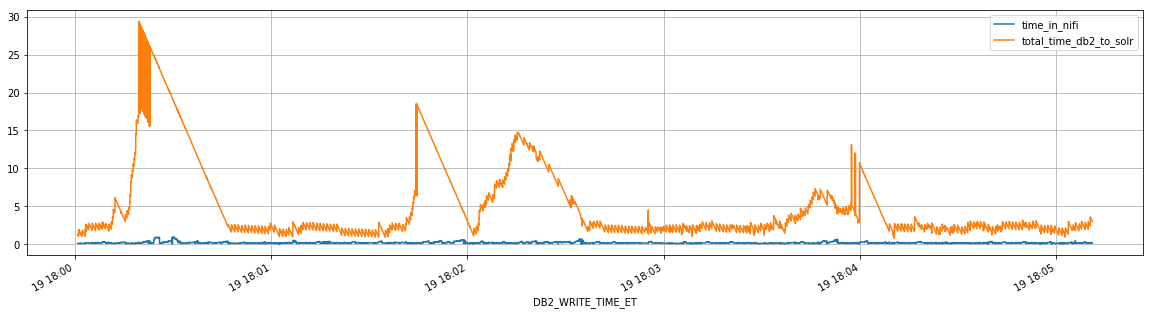

In [59]:
data["time_test"]=pd.to_datetime('2019-06-19 18:11:11.000000')
page_data= data[data['DB2_WRITE_TIME_ET'] < 
                                       data['time_test']]

data.plot(y=['time_in_nifi','total_time_db2_to_solr'],x='DB2_WRITE_TIME_ET',kind='line',grid=True,figsize=(20,5)) 
